# importing lib needed

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [4]:
df = pd.read_csv('Sales_Data/Sales_April_2019.csv')
df.head()

files = [file for file in os.listdir('./Sales_Data')]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

# merge individual csv 

In [5]:
all_month_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('Sales_Data/'+file)
    all_month_data = pd.concat([all_month_data, df])
    
all_month_data.to_csv('all_data.csv', index=False)
    

In [6]:
year_data = pd.read_csv('all_data.csv')
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
year_data.dropna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [8]:
year_data.shape

(186850, 6)

# clean data

In [9]:
year_data =  year_data.dropna(how = 'all')
year_data.head

<bound method NDFrame.head of        Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0  

# augment with aditional column

# add month column : run cell below first

In [11]:
year_data['month'] = year_data['Order Date'].str[0:2]
year_data['month'] = year_data['month'].astype('int32')

year_data

C:\Users\HP\AppData\Local\Temp\ipykernel_14628\1008492454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['month'] = year_data['Order Date'].str[0:2]
C:\Users\HP\AppData\Local\Temp\ipykernel_14628\1008492454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['month'] = year_data['month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


# find or and delete it

In [10]:
year_data = year_data[year_data['Order Date'].str[0:2] != 'Or']
#temp_df

year_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# add a sales column

# convert columns to right type i.e: str to int

In [12]:
year_data['Quantity Ordered'] = pd.to_numeric(year_data['Quantity Ordered'])
year_data['Price Each'] = pd.to_numeric(year_data['Price Each'])

C:\Users\HP\AppData\Local\Temp\ipykernel_14628\1002300264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Quantity Ordered'] = pd.to_numeric(year_data['Quantity Ordered'])
C:\Users\HP\AppData\Local\Temp\ipykernel_14628\1002300264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['Price Each'] = pd.to_numeric(year_data['Price Each'])


In [13]:
year_data['sales'] = year_data['Quantity Ordered'] * year_data['Price Each']
year_data

C:\Users\HP\AppData\Local\Temp\ipykernel_14628\3854520450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['sales'] = year_data['Quantity Ordered'] * year_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


# question 1 : what was the best month for sales and how much was made

In [14]:
result = year_data.groupby('month').sum()
result

,Quantity Ordered,Price Each,sales
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


<function matplotlib.pyplot.show(close=None, block=None)>

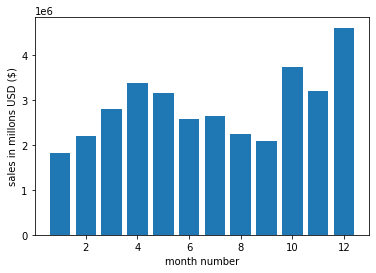

In [15]:
months = range(1,13)

plt.bar(months,result['sales'])
plt.xticks
plt.ylabel('sales in millons USD ($)')
plt.xlabel('month number')
plt.show

# question 2 ; what city sold the most product

In [29]:
def get_city (address):
    return address.split(',')[1]
    
def get_state (address):
    return address.split(',')[2]

year_data['city'] = year_data['Purchase Address'].apply(lambda x: get_city(x))

year_data

C:\Users\HP\AppData\Local\Temp\ipykernel_14628\1788147998.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['city'] = year_data['Purchase Address'].apply(lambda x: get_city(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [20]:
highest_state = year_data.groupby('city').sum()
highest_state

,Quantity Ordered,Price Each,month,sales
city,,,,
Atlanta,16602,2779908.20,104794,2795498.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Portland,14053,2307747.47,87765,2320490.61
San Francisco,50239,8211461.74,315520,8262203.91
Seattle,16553,2733296.01,104941,2747755.48


In [21]:
cities = [city for city, df in year_data.groupby("city")]

plt.bar(city,highest_state['sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('sales in USD ($)')
plt.xlabel('city name')
plt.show

NameError: name 'city' is not defined

### What time should we display advertisement

In [ ]:
year_data['Order Date'] = pd.to_datetime(year_data['Order Date'])

year_data

# what product sold the most

In [ ]:
product_group = year_data.groupby('Product') 
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.ylabel('quantity ordered')
plt.xlabel('product')
plt.show

In [ ]:
prices = year_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_xlabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Prices ($)', color = 'b')
ax1.set_xlabel(products, rotation = 'vertical', size = 8)

prices

plt.show

In [12]:
year_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [22]:
highest_state

,Quantity Ordered,Price Each,month,sales
city,,,,
Atlanta,16602,2779908.20,104794,2795498.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Portland,14053,2307747.47,87765,2320490.61
San Francisco,50239,8211461.74,315520,8262203.91
Seattle,16553,2733296.01,104941,2747755.48
